In [1]:
# Import statement
import os
import hist
import uproot
import statistics
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
from hist import Hist
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
file = uproot.open("/Users/deep/Downloads/egps_upstreamtagger_8_1_gev.root") # open the file
file.keys() #get objects in file

['LDMX_Events;4', 'LDMX_Events;3', 'LDMX_Run;1']

In [3]:
tree_name="LDMX_Events" 
file['LDMX_Events'].keys() #get keys in the object

['SimParticles_electron',
 'SimParticles_electron/SimParticles_electron.first',
 'SimParticles_electron/SimParticles_electron.second.energy_',
 'SimParticles_electron/SimParticles_electron.second.pdgID_',
 'SimParticles_electron/SimParticles_electron.second.genStatus_',
 'SimParticles_electron/SimParticles_electron.second.time_',
 'SimParticles_electron/SimParticles_electron.second.x_',
 'SimParticles_electron/SimParticles_electron.second.y_',
 'SimParticles_electron/SimParticles_electron.second.z_',
 'SimParticles_electron/SimParticles_electron.second.endX_',
 'SimParticles_electron/SimParticles_electron.second.endY_',
 'SimParticles_electron/SimParticles_electron.second.endZ_',
 'SimParticles_electron/SimParticles_electron.second.px_',
 'SimParticles_electron/SimParticles_electron.second.py_',
 'SimParticles_electron/SimParticles_electron.second.pz_',
 'SimParticles_electron/SimParticles_electron.second.endpx_',
 'SimParticles_electron/SimParticles_electron.second.endpy_',
 'SimParti

In [4]:
branch_name = "TargetScoringPlaneHits_electron/TargetScoringPlaneHits_electron.x_" # Branch to read
data = file[tree_name][branch_name].array() # Read into an np array
truth_target_position_x = np.array(ak.firsts(data)) # Get the position of the largest energy electron for each sub index. It's in descending order
branch_name= "EcalScoringPlaneHits_electron/EcalScoringPlaneHits_electron.x_"
data = file[tree_name][branch_name].array()
truth_ecal_position_x = np.array(ak.firsts(data))
dx = truth_ecal_position_x- truth_target_position_x # Get the difference in the x position
print(np.sort(dx)) # Print the sorted value to visualize the hist. Min max is more efficient

[-384.4005   -234.96034  -217.43074  ...   83.383995   83.47665
  217.06808 ]


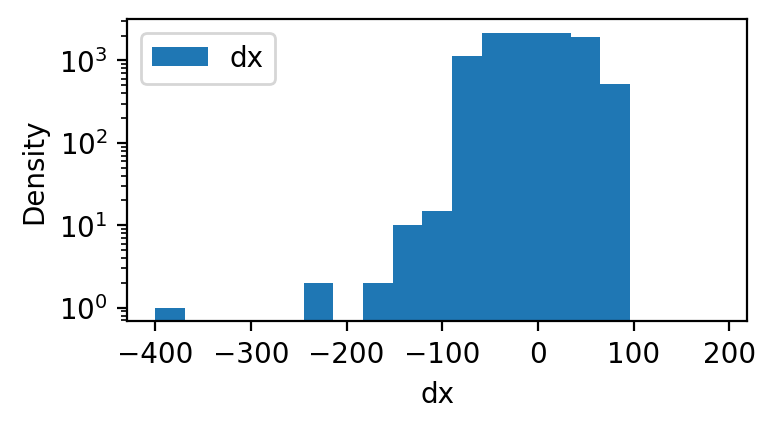

In [5]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=200) #plot dx
ax.hist(dx, label='dx',bins = np.arange(-400, 220, 31))
ax.set_xlabel('dx')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [6]:
branch_name= "TargetScoringPlaneHits_electron.energy_" 
data = file[tree_name][branch_name].array()
truth_target_energy = ak.firsts(data) # Retrieving the highest energy
print(f"min is : {np.min(truth_target_energy)} max is : {np.max(truth_target_energy)}") # Getting the miun and max for plotting

min is : 3.5157597064971924 max is : 7998.88037109375


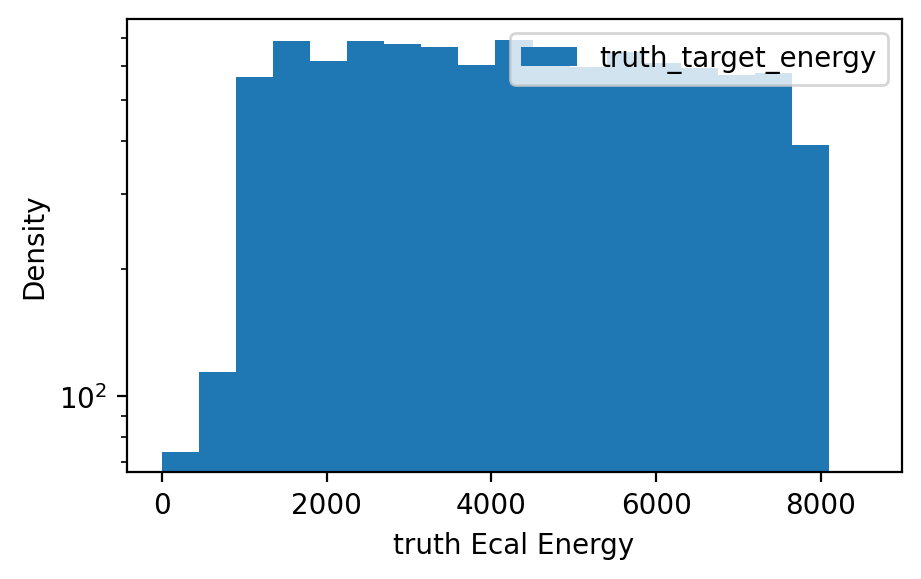

In [7]:
fig, ax = plt.subplots(figsize=(5, 3), dpi=200) # Plot the energy
ax.hist(truth_target_energy, label='truth_target_energy',bins = np.arange(0, 9000, 450))
ax.set_xlabel('truth Ecal Energy')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [8]:
branch_name= "TargetScoringPlaneHits_electron/TargetScoringPlaneHits_electron.px_"
data = file[tree_name][branch_name].array()
x_momentum= ak.firsts(data) # Get the momentum from the index of the largest energy
print(f"min is : {np.min(x_momentum)} max is : {np.max(x_momentum)}")

min is : -2574.86669921875 max is : 2604.52392578125


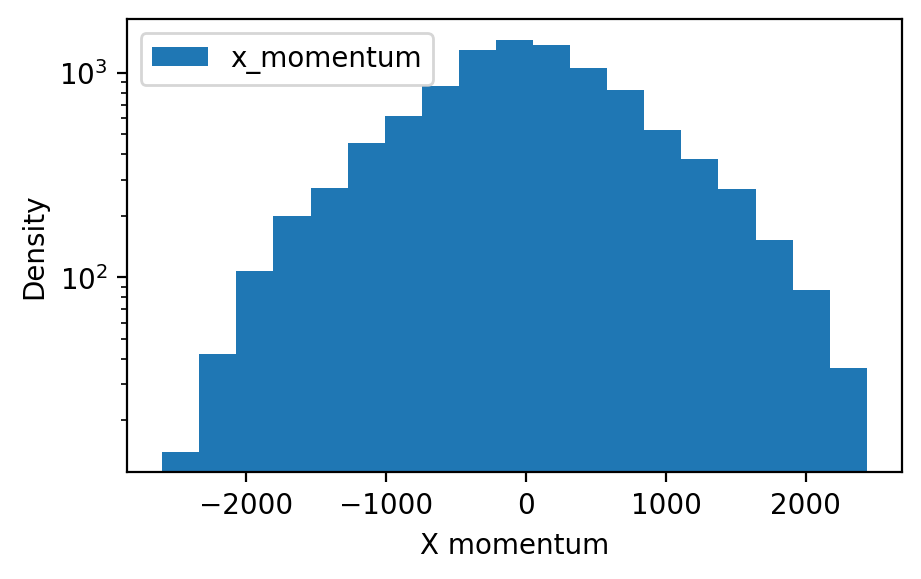

In [9]:
fig, ax = plt.subplots(figsize = (5,3), dpi= 200) # Plot the x_momentum
ax.hist(x_momentum, label='x_momentum',bins = np.arange(-2600, 2700, 265))
ax.set_xlabel('X momentum')
ax.set_ylabel('Density')
ax.set_yscale('log')
ax.legend()
plt.show()

In [10]:
h3 = (  # Create a 3D hist of the different quantities
    Hist.new.Reg(10, -20, 20, name="px") # Make the first axis with the Momentum in x
    .Reg(10, 0, 8000, name="e") # Make 2nd axis with Energy
    .Reg(10, -40, 40, name="dx") # Make 3rd axis with difference of Ecal and Truth X position
    .Double()
)


In [11]:
h3.fill(px = x_momentum, e=truth_target_energy, dx= dx) #filling the plots

Hist(
  Regular(10, -20, 20, name='px'),
  Regular(10, 0, 8000, name='e'),
  Regular(10, -40, 40, name='dx'),
  storage=Double()) # Sum: 205.0 (10000.0 with flow)

In [12]:
print (h3.project("e").to_numpy()[1]) # Index 0 corresponds to frequency
print (h3.project("px").to_numpy()[1])  # Index 1 corresponds to bin ranges

[   0.  800. 1600. 2400. 3200. 4000. 4800. 5600. 6400. 7200. 8000.]
[-20. -16. -12.  -8.  -4.   0.   4.   8.  12.  16.  20.]


In [13]:
print (h3.project("dx")) # Visually see what is going on with the bining and frequency

                 ┌───────────────────────────────────────────────────────────┐
[-inf, -40) 2398 │██████████████████████████████████████████████████████████ │
[ -40, -32) 580  │██████████████                                             │
[ -32, -24) 657  │███████████████▉                                           │
[ -24, -16) 576  │█████████████▉                                             │
[ -16,  -8) 525  │████████████▊                                              │
[  -8,   0) 511  │████████████▍                                              │
[   0,   8) 482  │███████████▋                                               │
[   8,  16) 495  │████████████                                               │
[  16,  24) 622  │███████████████                                            │
[  24,  32) 579  │██████████████                                             │
[  32,  40) 570  │█████████████▊                                             │
[  40, inf) 2005 │██████████████████████████████████

                 ┌───────────────────────────────────────────────────────────┐
[-inf, -40) 2398 │██████████████████████████████████████████████████████████ │
[ -40, -32) 580  │██████████████                                             │
[ -32, -24) 657  │███████████████▉                                           │
[ -24, -16) 576  │█████████████▉                                             │
[ -16,  -8) 525  │████████████▊                                              │
[  -8,   0) 511  │████████████▍                                              │
[   0,   8) 482  │███████████▋                                               │
[   8,  16) 495  │████████████                                               │
[  16,  24) 622  │███████████████                                            │
[  24,  32) 579  │██████████████                                             │
[  32,  40) 570  │█████████████▊                                             │
[  40, inf) 2005 │██████████████████████████████████

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1338ffeb0>, errorbar=None, legend_artist=None)]

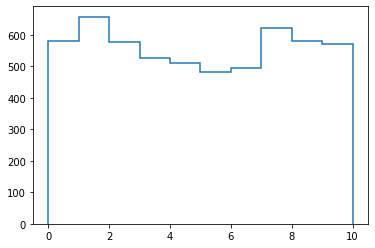

In [14]:
first_bin = h3[0:1,0:1,:] # take the first bion of Energy and momentum then plot the entirety of dx aaccross those bins
print(first_bin.project("dx")) # print the projection
hep.histplot(first_bin.project("dx").view()) # View the histogram representation

In [15]:
first_bin.project("dx").values() # Show the frequency of each bin /counts

array([580., 657., 576., 525., 511., 482., 495., 622., 579., 570.])

In [16]:
first_bin.project("dx").view() # Does the same as .value

array([580., 657., 576., 525., 511., 482., 495., 622., 579., 570.])

In [17]:
h3.project("e") #same as projecting as a 1D hist

Hist(Regular(10, 0, 8000, name='e'), storage=Double()) # Sum: 10000.0

In [18]:
results=first_bin.to_numpy() # saccest the bininng for the first bin and counts by turning to np array
print (results)

(array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]]), array([-20., -16.]), array([  0., 800.]), array([-40., -32., -24., -16.,  -8.,   0.,   8.,  16.,  24.,  32.,  40.]))


In [19]:
counts = results[0][0][0] # Where the array of the counts is 
bins = results[3] #  Where the array of the results is
print (counts)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
mids = 0.5*(bins[1:] + bins[:-1]) # Midpoint of the bin
probs = counts / np.sum(counts) # Probability of that bin over all bins 
mean = np.sum(probs * mids)  # Mean is the probability of that bin times mid of the bin(to repressent the boundaries of the bin as 1 value
sd = np.sqrt(np.sum(probs * (mids - mean)**2)) # Standard Dev. 
print(f"Mean value:, {mean} standard deviation : {sd}")

Mean value:, -28.0 standard deviation : 0.0


[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]


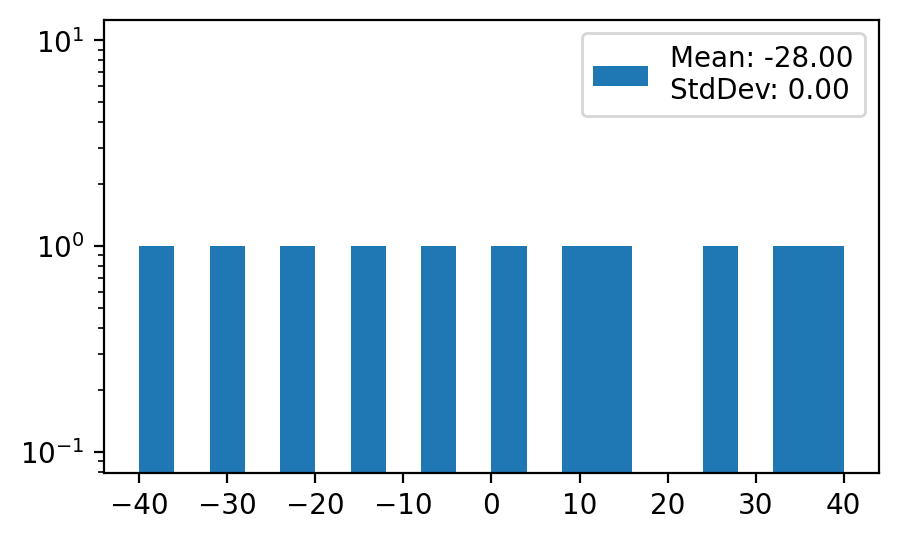

In [21]:
bin_arr = first_bin.view()  # Not what to plot. This is just the place of where elemnts are
print (np.sort(bin_arr))
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)
ax.hist(bins, label = "for bin 1", bins = 20)
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f}"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


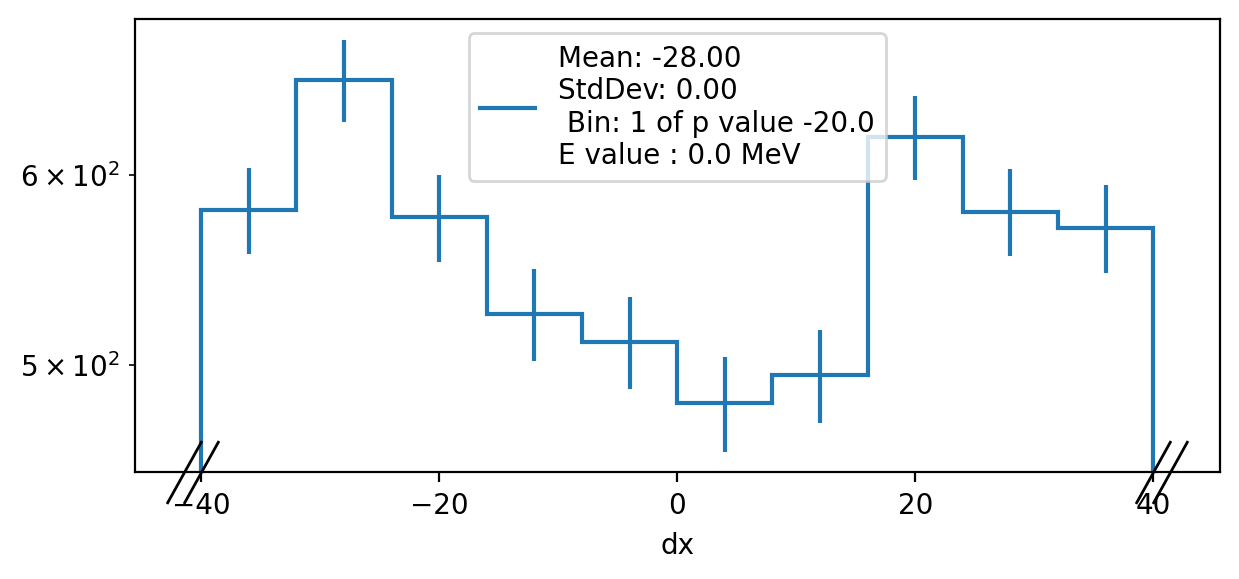

In [22]:
index = 0 # for the first bin at index 0 of the bins array
tmp_momentum = h3.project("px").to_numpy()[1][index] # Retrieve the momentum  for first bin
tmp_energy = h3.project("e").to_numpy()[1][index] # Retrieve the energy of first bin
fig, ax = plt.subplots(figsize=(7, 3), dpi=200) # Plot the first bin
hep.histplot(first_bin.project("dx"), ax=ax, label="Bin 1")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [23]:
second_bin = h3[1:2,1:2,:] # start < stop #repeat 9 times
results=second_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))
index = 1
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


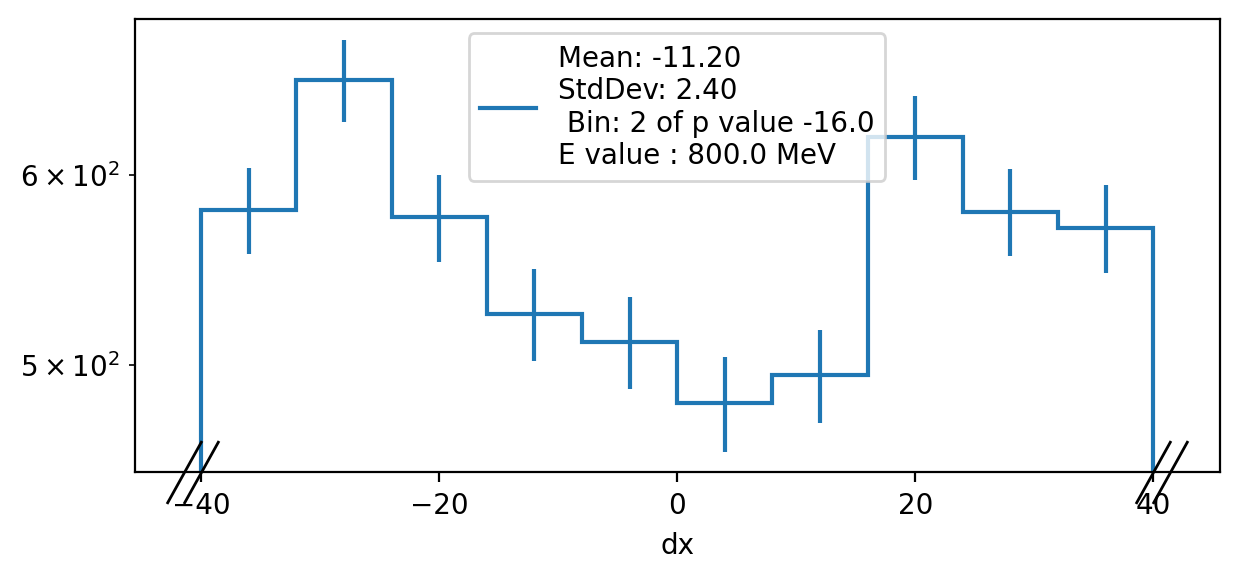

In [24]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(first_bin.project("dx"), ax=ax, label="Bin 1")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [25]:
third_bin = h3[2:3,2:3,:] # start < stop
results=third_bin.to_numpy()
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


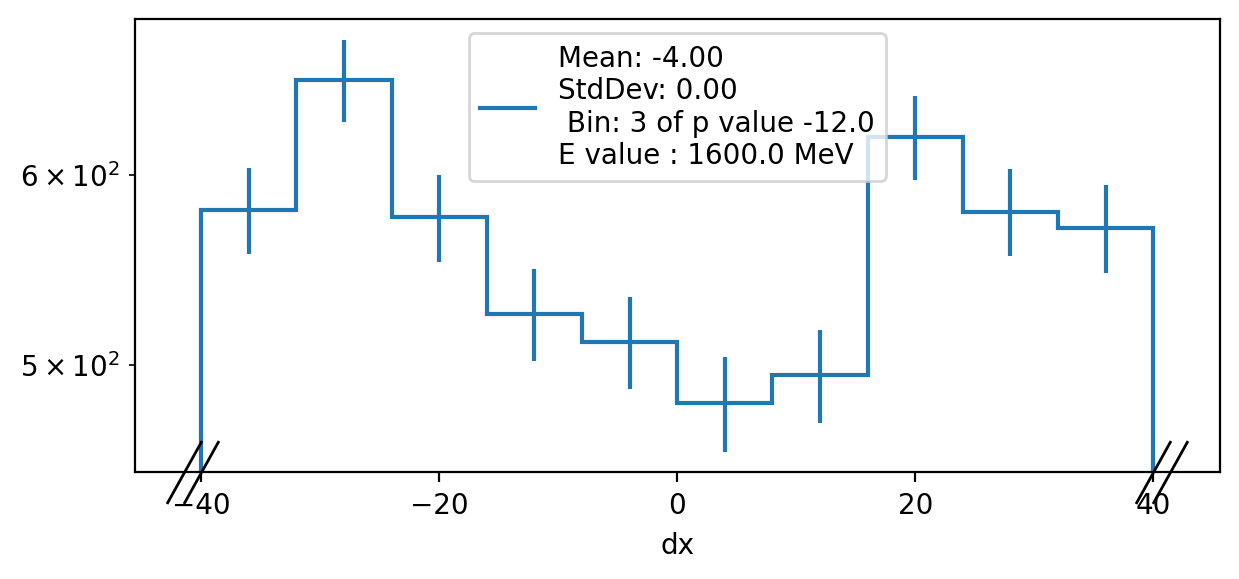

In [26]:
index = 2
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 3")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [27]:
fourth_bin = h3[3:4, 3:4, :]
results=fourth_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


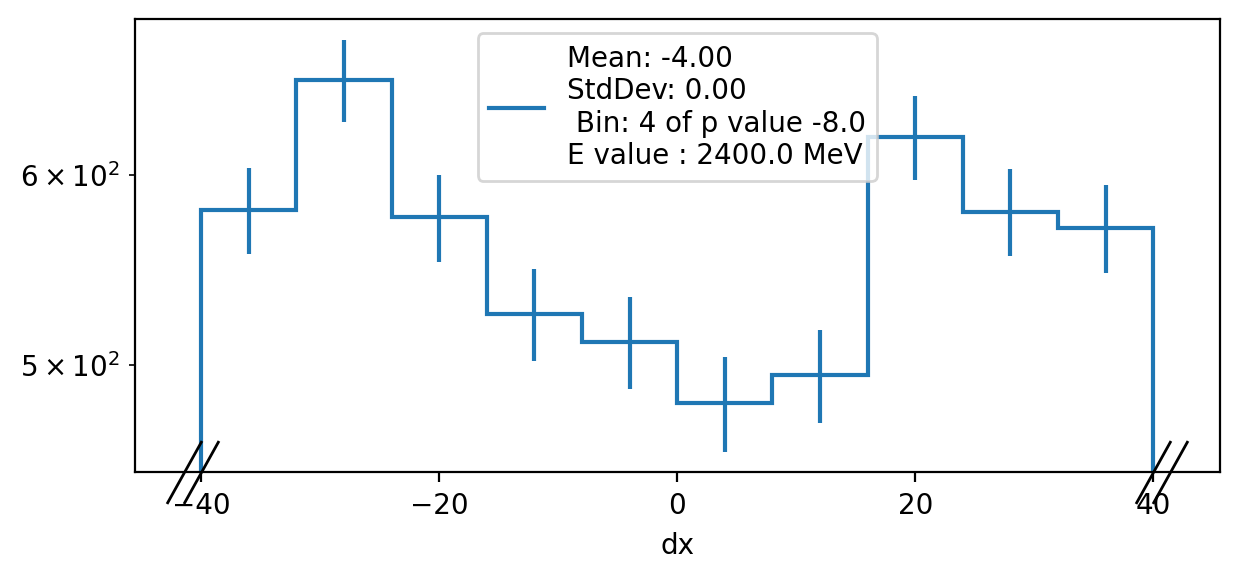

In [28]:
index = 3
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 4")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [29]:
fifth_bin = fifth_bin = h3[4:5, 4:5, :]
results=fifth_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


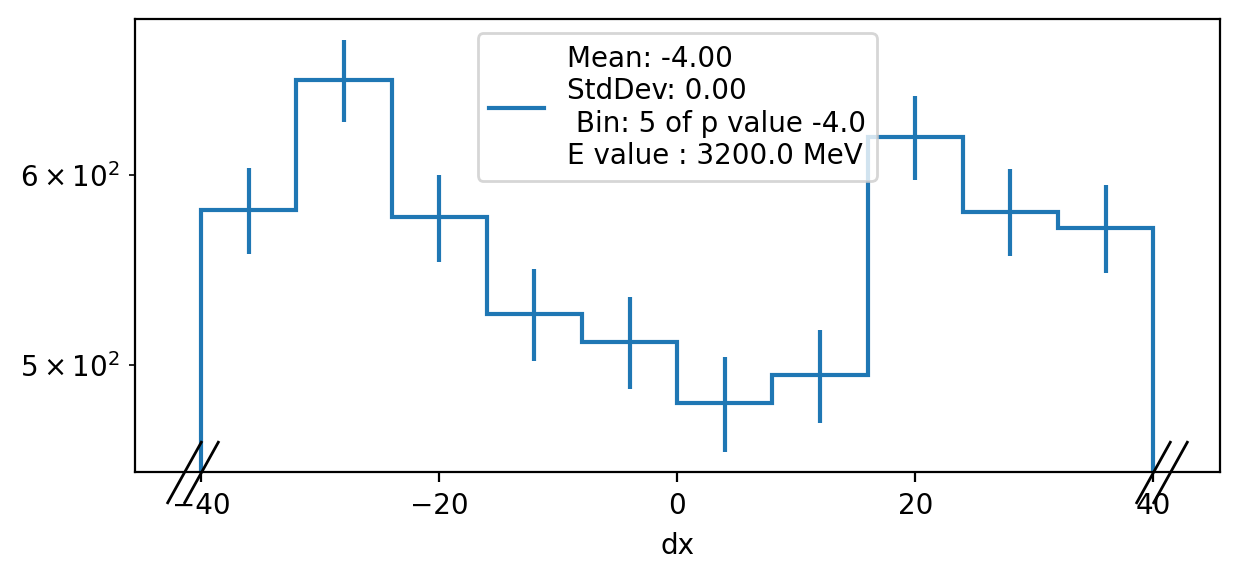

In [30]:
index = 4
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 5")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [31]:
sixth_bin= h3[5:6, 5:6, :]
results=sixth_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


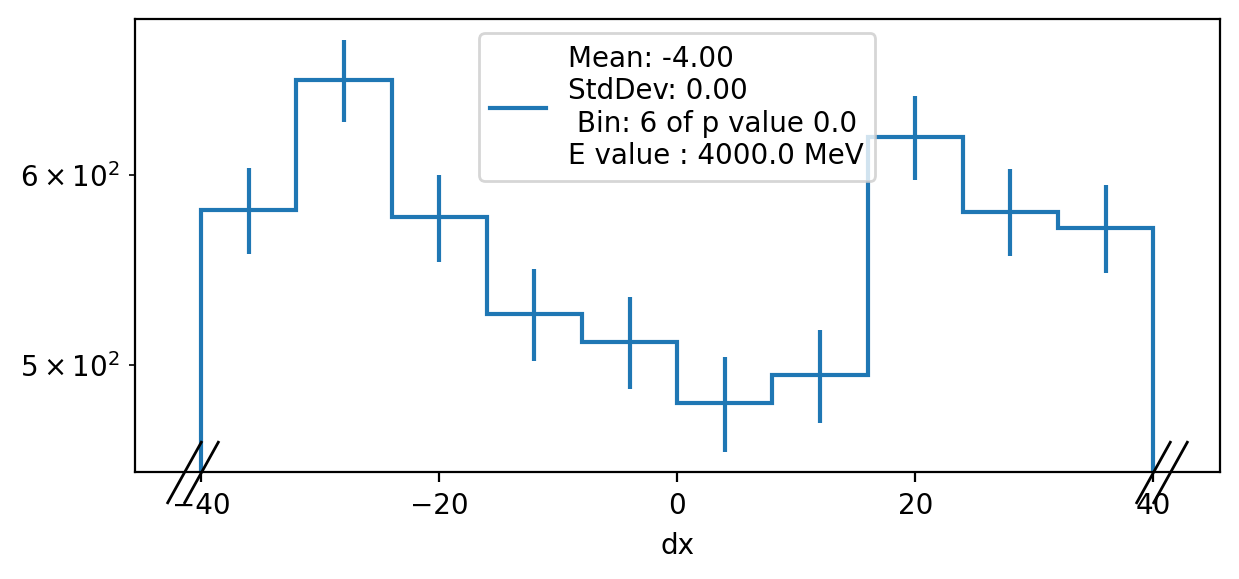

In [32]:
index = 5
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 6")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [33]:
seventh_bin= h3[6:7, 6:7, :]
results=seventh_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
if (np.sum(counts) == 0): # Put a condition of if the counts == 0, to prevent aritmetic computation for empty array of bins
    probs = 0
else :
    probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


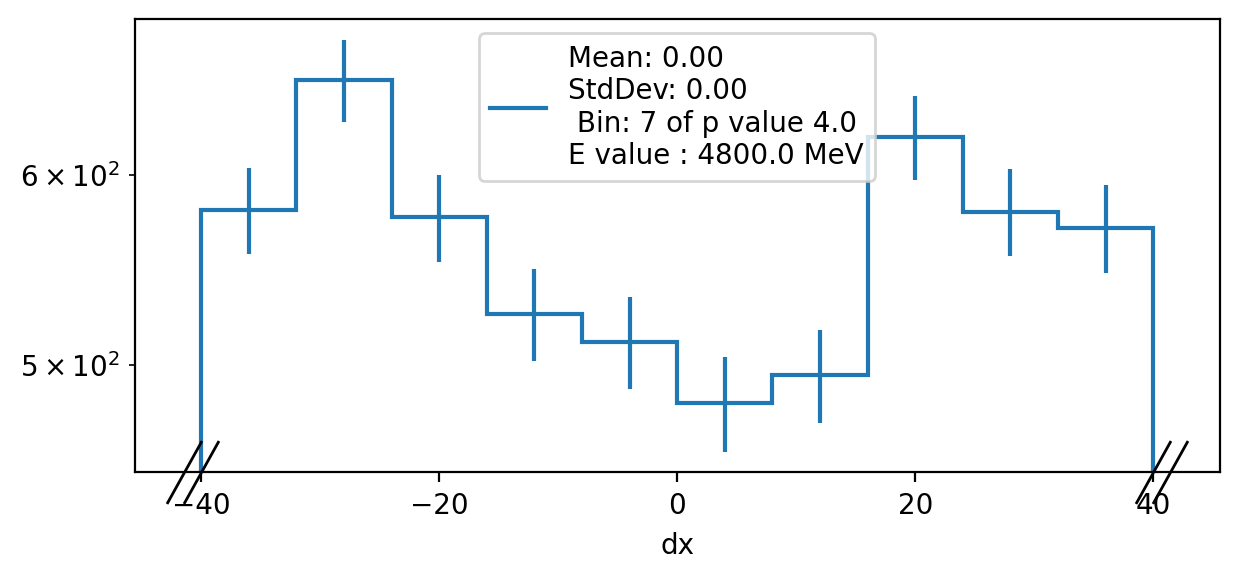

In [34]:
index = 6
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 7")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum}\nE value : {tmp_energy} MeV"
ax.legend([legend_text])
ax.set_yscale('log')
plt.show()

In [35]:
eight_bin = h3[7:8, 7:8, :]
results=eight_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
if (np.sum(counts) == 0):
    probs = 0
else :
    probs = counts / np.sum(counts)
mean = np.sum(probs * mids) 
probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


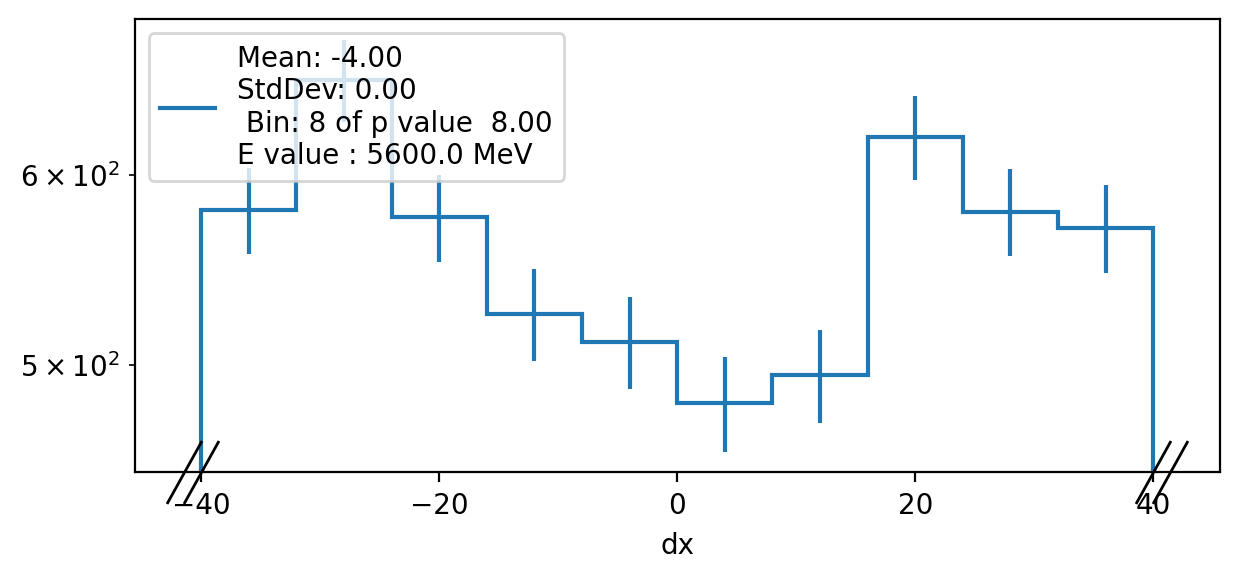

In [36]:
index = 7
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 8")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum: .2f}\nE value : {tmp_energy} MeV"
ax.legend([legend_text], loc="upper left")
ax.set_yscale('log')
plt.show()

In [37]:
ninth_bin = h3[8:9,8:9,:]
results=ninth_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
if (np.sum(counts) == 0):
    probs = 0
else :
    probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


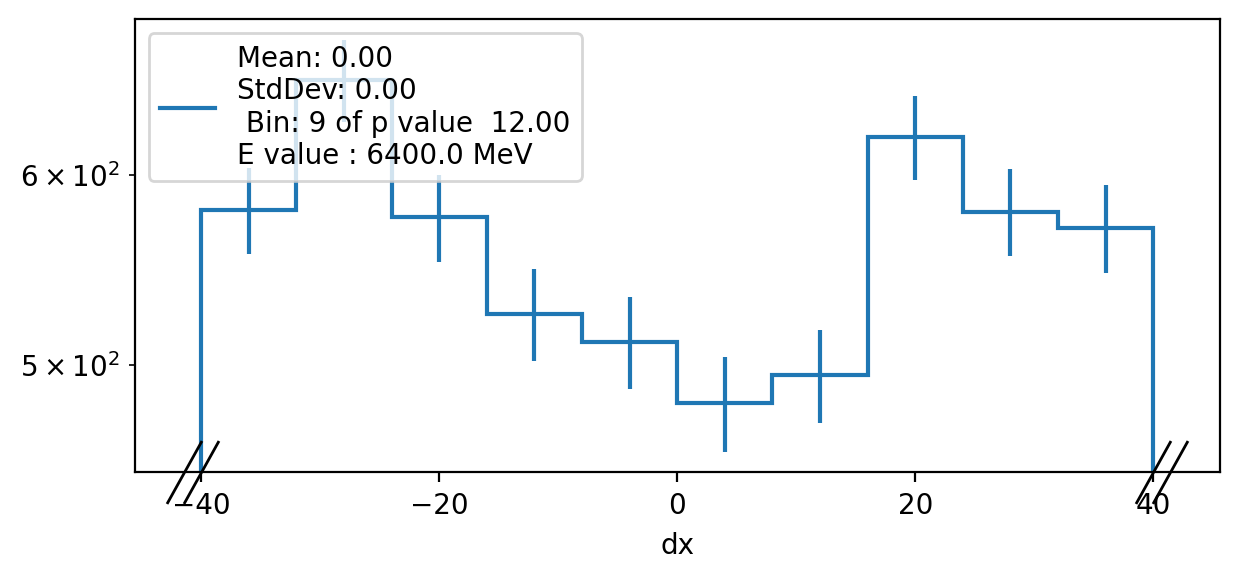

In [38]:
index = 8
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 9")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum: .2f}\nE value : {tmp_energy} MeV"
ax.legend([legend_text], loc="upper left")
ax.set_yscale('log')
plt.show()

In [39]:
tenth_bin = h3[9:10,9:10,:]
results=tenth_bin.to_numpy() 
counts= results[0][0][0] 
bins = results[3]
mids = 0.5*(bins[1:] + bins[:-1])
if (np.sum(counts) == 0):
    probs = 0
else :
    probs = counts / np.sum(counts)
mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

/Users/deep/anaconda3/envs/ldmx/lib/python3.9/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


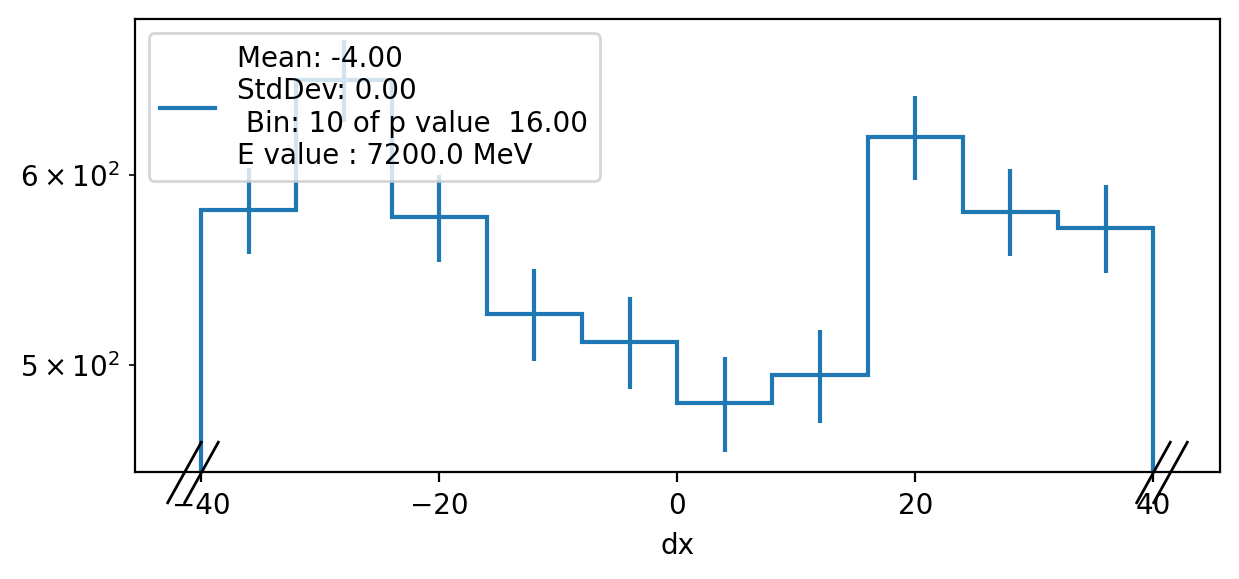

In [40]:
index = 9
tmp_momentum = h3.project("px").to_numpy()[1][index]
tmp_energy = h3.project("e").to_numpy()[1][index]
fig, ax = plt.subplots(figsize=(7, 3), dpi=200)
hep.histplot(third_bin.project("dx"), ax=ax, label="Bin 10")
legend_text = f"Mean: {mean:.2f}\nStdDev: {sd:.2f} \n Bin: {index +1} of p value {tmp_momentum: .2f}\nE value : {tmp_energy} MeV"
ax.legend([legend_text], loc="upper left")
ax.set_yscale('log')
plt.show()